In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# 2330
df = pd.read_csv('2330.TW.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-05,69.649033,71.214043,68.866341,71.214043,37.327374,4.024668e+11
1,2000-01-06,70.822884,71.214043,69.649033,69.649033,36.507061,1.975457e+11
2,2000-01-07,67.301331,68.475182,66.518639,67.692490,35.481518,2.352703e+11
3,2000-01-10,69.649033,70.431351,68.475182,70.040192,36.712093,2.761717e+11
4,2000-01-11,70.822884,71.605202,68.475182,68.866341,36.096809,2.777695e+11
...,...,...,...,...,...,...,...
5393,2021-07-26,591.000000,591.000000,580.000000,580.000000,580.000000,2.161918e+07
5394,2021-07-27,581.000000,584.000000,580.000000,580.000000,580.000000,1.778599e+07
5395,2021-07-28,576.000000,579.000000,573.000000,579.000000,579.000000,3.615830e+07
5396,2021-07-29,585.000000,585.000000,577.000000,583.000000,583.000000,2.322490e+07


In [3]:
n = 20

In [4]:
df = df.loc[df['Date'] > '2020-10-01']
len(df)

200

In [5]:
df['Volume'].fillna(0).astype('int')

5198    32945832
5199    35775395
5200    42926239
5201    60853811
5202    64719223
          ...   
5393    21619179
5394    17785992
5395    36158305
5396    23224896
5397    18999281
Name: Volume, Length: 200, dtype: int32

In [6]:
df['Volume'].fillna(0).astype('int').apply(lambda x: x/1000)

5198    32945.832
5199    35775.395
5200    42926.239
5201    60853.811
5202    64719.223
          ...    
5393    21619.179
5394    17785.992
5395    36158.305
5396    23224.896
5397    18999.281
Name: Volume, Length: 200, dtype: float64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-7-b9c6864122be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 5198 to 5397
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       200 non-null    datetime64[ns]
 1   Open       200 non-null    float64       
 2   High       200 non-null    float64       
 3   Low        200 non-null    float64       
 4   Close      200 non-null    float64       
 5   Adj Close  200 non-null    float64       
 6   Volume     200 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 12.5 KB


<AxesSubplot:xlabel='Date'>

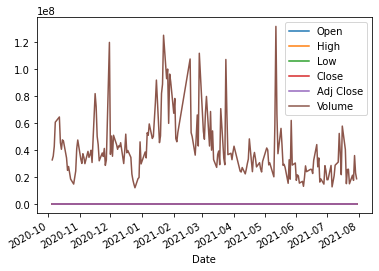

In [9]:
df.plot(x='Date')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

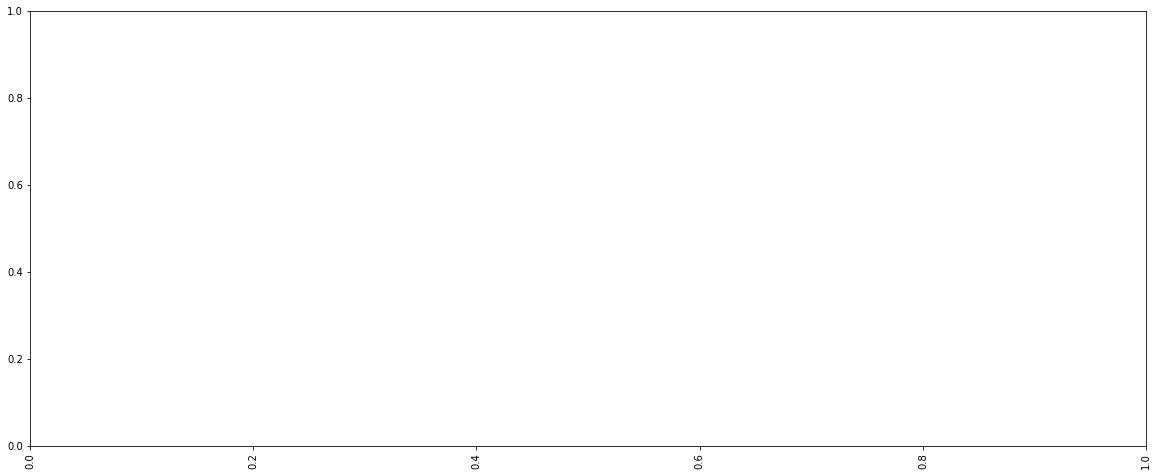

In [10]:
fig = plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

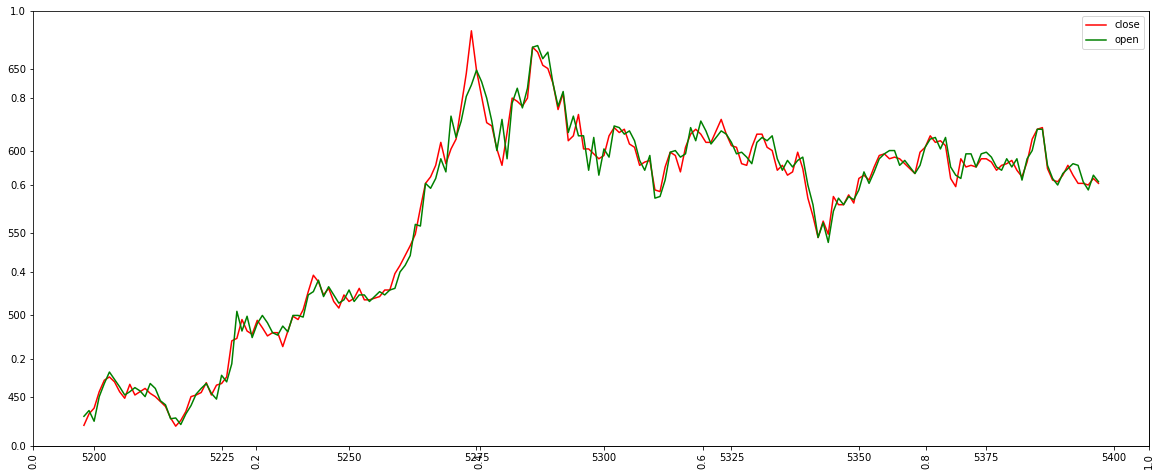

In [11]:
fig = plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.plot(df['Close'], color='red', label='close')
ax1.plot(df['Open'], color='green', label='open')
plt.legend()
#ax2 = ax1.twinx()
#plt.bar(df['Date'], df['Volume'].fillna(0).astype('int')//100000)
#ax3 = ax1.twinx()
plt.show()

In [12]:
total_cnt = len(df)
test_cnt = int(total_cnt*0.3)
test_cnt

60

In [13]:
#test_data = df.loc[df['Date'] > '2020-10-01']
test_data = df[0:test_cnt]
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
5198,2020-10-05,438.0,438.0,431.5,432.5,426.861694,32945832.0
5199,2020-10-06,441.5,442.0,437.5,439.5,433.770477,35775395.0
5200,2020-10-07,435.0,445.0,435.0,443.0,437.224823,42926239.0
5201,2020-10-08,450.0,454.0,448.5,453.0,447.094482,60853811.0
5202,2020-10-12,458.0,462.0,457.5,460.0,454.003204,64719223.0
5203,2020-10-13,465.0,465.0,456.5,462.0,455.977142,45750738.0
5204,2020-10-14,460.5,461.0,457.0,459.0,453.016266,40809241.0
5205,2020-10-15,456.0,456.5,450.0,453.0,447.094482,47775028.0
5206,2020-10-16,451.0,456.0,448.5,449.0,443.146606,46876801.0
5207,2020-10-19,453.0,457.5,451.0,457.5,451.535797,34470906.0


In [14]:
train_data = df[:len(df)-len(test_data)]
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
5198,2020-10-05,438.0,438.0,431.5,432.5,426.861694,32945832.0
5199,2020-10-06,441.5,442.0,437.5,439.5,433.770477,35775395.0
5200,2020-10-07,435.0,445.0,435.0,443.0,437.224823,42926239.0
5201,2020-10-08,450.0,454.0,448.5,453.0,447.094482,60853811.0
5202,2020-10-12,458.0,462.0,457.5,460.0,454.003204,64719223.0
...,...,...,...,...,...,...,...
5333,2021-04-29,609.0,609.0,600.0,600.0,597.520691,31828333.0
5334,2021-05-03,595.0,597.0,588.0,588.0,585.570251,41762441.0
5335,2021-05-04,588.0,594.0,582.0,591.0,588.557861,40273595.0
5336,2021-05-05,594.0,594.0,585.0,585.0,582.582642,29254785.0


In [15]:
test_set = test_data['Open']
test_set

5198    438.0
5199    441.5
5200    435.0
5201    450.0
5202    458.0
5203    465.0
5204    460.5
5205    456.0
5206    451.0
5207    453.0
5208    455.5
5209    453.5
5210    450.0
5211    458.0
5212    455.0
5213    447.5
5214    445.0
5215    436.5
5216    437.0
5217    433.0
5218    439.5
5219    444.5
5220    451.5
5221    455.0
5222    458.0
5223    452.0
5224    448.5
5225    463.0
5226    459.0
5227    470.0
5228    502.0
5229    490.0
5230    499.0
5231    486.0
5232    494.5
5233    499.5
5234    495.0
5235    489.0
5236    487.5
5237    493.0
5238    489.5
5239    499.5
5240    499.5
5241    498.5
5242    512.0
5243    514.0
5244    521.0
5245    511.0
5246    517.0
5247    512.0
5248    507.0
5249    509.0
5250    515.0
5251    508.0
5252    512.0
5253    512.0
5254    508.0
5255    511.0
5256    514.0
5257    512.0
Name: Open, dtype: float64

In [16]:
train_set = train_data['Open']
train_set

5198    438.0
5199    441.5
5200    435.0
5201    450.0
5202    458.0
        ...  
5333    609.0
5334    595.0
5335    588.0
5336    594.0
5337    590.0
Name: Open, Length: 140, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
sc = MinMaxScaler(feature_range=(0,1))

In [19]:
train_set = train_set.values.reshape(-1,1)
train_set

array([[438. ],
       [441.5],
       [435. ],
       [450. ],
       [458. ],
       [465. ],
       [460.5],
       [456. ],
       [451. ],
       [453. ],
       [455.5],
       [453.5],
       [450. ],
       [458. ],
       [455. ],
       [447.5],
       [445. ],
       [436.5],
       [437. ],
       [433. ],
       [439.5],
       [444.5],
       [451.5],
       [455. ],
       [458. ],
       [452. ],
       [448.5],
       [463. ],
       [459. ],
       [470. ],
       [502. ],
       [490. ],
       [499. ],
       [486. ],
       [494.5],
       [499.5],
       [495. ],
       [489. ],
       [487.5],
       [493. ],
       [489.5],
       [499.5],
       [499.5],
       [498.5],
       [512. ],
       [514. ],
       [521. ],
       [511. ],
       [517. ],
       [512. ],
       [507. ],
       [509. ],
       [515. ],
       [508. ],
       [512. ],
       [512. ],
       [508. ],
       [511. ],
       [514. ],
       [512. ],
       [515. ],
       [516. ],
       [

In [20]:
train_set_sc = sc.fit_transform(train_set)
train_set_sc

array([[0.02164502],
       [0.03679654],
       [0.00865801],
       [0.07359307],
       [0.10822511],
       [0.13852814],
       [0.11904762],
       [0.0995671 ],
       [0.07792208],
       [0.08658009],
       [0.0974026 ],
       [0.08874459],
       [0.07359307],
       [0.10822511],
       [0.0952381 ],
       [0.06277056],
       [0.05194805],
       [0.01515152],
       [0.01731602],
       [0.        ],
       [0.02813853],
       [0.04978355],
       [0.08008658],
       [0.0952381 ],
       [0.10822511],
       [0.08225108],
       [0.06709957],
       [0.12987013],
       [0.11255411],
       [0.16017316],
       [0.2987013 ],
       [0.24675325],
       [0.28571429],
       [0.22943723],
       [0.26623377],
       [0.28787879],
       [0.26839827],
       [0.24242424],
       [0.23593074],
       [0.25974026],
       [0.24458874],
       [0.28787879],
       [0.28787879],
       [0.28354978],
       [0.34199134],
       [0.35064935],
       [0.38095238],
       [0.337

In [21]:
x_train = []
y_train = []

In [22]:
for i in range(n, len(train_set)):
    x_train.append(train_set_sc[i-n:i-1, 0])
    y_train.append(train_set_sc[i,0])

In [23]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train

array([[0.02164502, 0.03679654, 0.00865801, ..., 0.05194805, 0.01515152,
        0.01731602],
       [0.03679654, 0.00865801, 0.07359307, ..., 0.01515152, 0.01731602,
        0.        ],
       [0.00865801, 0.07359307, 0.10822511, ..., 0.01731602, 0.        ,
        0.02813853],
       ...,
       [0.70562771, 0.71428571, 0.78354978, ..., 0.75757576, 0.74891775,
        0.76190476],
       [0.71428571, 0.78354978, 0.74891775, ..., 0.74891775, 0.76190476,
        0.7012987 ],
       [0.78354978, 0.74891775, 0.8008658 , ..., 0.76190476, 0.7012987 ,
        0.67099567]])

In [25]:
y_train

array([0.02813853, 0.04978355, 0.08008658, 0.0952381 , 0.10822511,
       0.08225108, 0.06709957, 0.12987013, 0.11255411, 0.16017316,
       0.2987013 , 0.24675325, 0.28571429, 0.22943723, 0.26623377,
       0.28787879, 0.26839827, 0.24242424, 0.23593074, 0.25974026,
       0.24458874, 0.28787879, 0.28787879, 0.28354978, 0.34199134,
       0.35064935, 0.38095238, 0.33766234, 0.36363636, 0.34199134,
       0.32034632, 0.32900433, 0.35497835, 0.32467532, 0.34199134,
       0.34199134, 0.32467532, 0.33766234, 0.35064935, 0.34199134,
       0.35497835, 0.35930736, 0.4025974 , 0.41991342, 0.44588745,
       0.52813853, 0.52380952, 0.63636364, 0.62337662, 0.64935065,
       0.7012987 , 0.66666667, 0.81385281, 0.75757576, 0.8008658 ,
       0.86580087, 0.8961039 , 0.93506494, 0.9047619 , 0.86147186,
       0.8008658 , 0.72294372, 0.80519481, 0.7012987 , 0.84848485,
       0.88744589, 0.83549784, 0.88744589, 0.995671  , 1.        ,
       0.96536797, 0.98268398, 0.9004329 , 0.83982684, 0.87878

In [26]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.02164502],
        [0.03679654],
        [0.00865801],
        ...,
        [0.05194805],
        [0.01515152],
        [0.01731602]],

       [[0.03679654],
        [0.00865801],
        [0.07359307],
        ...,
        [0.01515152],
        [0.01731602],
        [0.        ]],

       [[0.00865801],
        [0.07359307],
        [0.10822511],
        ...,
        [0.01731602],
        [0.        ],
        [0.02813853]],

       ...,

       [[0.70562771],
        [0.71428571],
        [0.78354978],
        ...,
        [0.75757576],
        [0.74891775],
        [0.76190476]],

       [[0.71428571],
        [0.78354978],
        [0.74891775],
        ...,
        [0.74891775],
        [0.76190476],
        [0.7012987 ]],

       [[0.78354978],
        [0.74891775],
        [0.8008658 ],
        ...,
        [0.76190476],
        [0.7012987 ],
        [0.67099567]]])

In [27]:
x_train[0]

array([[0.02164502],
       [0.03679654],
       [0.00865801],
       [0.07359307],
       [0.10822511],
       [0.13852814],
       [0.11904762],
       [0.0995671 ],
       [0.07792208],
       [0.08658009],
       [0.0974026 ],
       [0.08874459],
       [0.07359307],
       [0.10822511],
       [0.0952381 ],
       [0.06277056],
       [0.05194805],
       [0.01515152],
       [0.01731602]])

In [28]:
y_train[0]

0.02813852813852824

modeling

In [29]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=100, input_shape=(x_train.shape[1], 1) ) )

In [ ]:
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [ ]:
model.summary()

In [ ]:
mymodel = model.fit(x_train, y_train, epochs=100, batch_size=16)

In [ ]:
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(mymodel.history['loss'])

In [ ]:
mymodel.history

In [ ]:
total_data_set = pd.concat((train_data['Open'], test_data['Open']), axis=0)
total_data_set

In [ ]:
inputs = total_data_set[len(total_data_set) - len(test_data) - 10:].values
inputs

In [ ]:
inputs = inputs.reshape(-1,1)
inputs

In [ ]:
inputs = sc.transform(inputs)
inputs

In [ ]:
x_test = []
for i in range(10, len(inputs)):
    x_test.append(inputs[i-10:i-1, 0])
x_test = np.array(x_test)
x_test

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

In [ ]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

In [ ]:
plt.plot(test_data['Open'].values, color='black', label = "real open price")
plt.plot(predicted_stock_price, color='green', label = "predicted price")
plt.title('stock price predict, n = {}'.format(n))
plt.xlabel('Date')
plt.ylabel('stock price')
plt.legend()
plt.show()